## Part 1: Import statements

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D as Conv1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Importing cleaned data

In [2]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data

,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


In [3]:
number_tweets = len(data["tweet"])
print(f"Number of sentences: {number_tweets}")

Number of sentences: 23865


## Part 3: Splitting Data

In [4]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [5]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

In [6]:
X_train.sample(5)

22398                          biatch called bitch
19928           whatupwyd b square wbu bitch wat u
24113          bitch ass arod shorty dont hit back
22298    niggas designing bitches got zippers hoes
5343                 hate birds piss fact cant fly
Name: tweet, dtype: object

## Checking vocabulary size

Count Vectorization to check vocabulary size

In [7]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 13309,
 'spoiling': 12986,
 'fags': 4628,
 'wcw': 15221,
 'babes': 805,
 'love': 8196,
 'thse': 14058,
 'sexy': 12145,
 'bitches': 1302,
 'bestfriend': 1181,
 'babe': 804,
 'yanks': 15762,
 'coming': 2736,
 'disparagement': 3764,
 'pride': 10705,
 'rather': 11121,
 'jack': 7110,
 'fuck': 5249,
 'hoes': 6379,
 'tbh': 13780,
 'shit': 12260,
 'boring': 1545,
 'give': 5558,
 'wife': 15449,
 'lmfao': 8072,
 'little': 8038,
 'like': 7968,
 'message': 8649,
 'hoe': 6363,
 'need': 9246,
 'plan': 10391,
 'stuff': 13400,
 'thats': 13929,
 'saying': 11886,
 'ive': 7100,
 'pinto': 10352,
 'since': 12441,
 'dude': 4065,
 'iphone': 7026,
 'beginning': 1107,
 'gerryshalloweenparty': 5478,
 'halloween': 5985,
 'yesterday': 15833,
 'stupid': 13412,
 'nigger': 9376,
 'youre': 15879,
 'dismissed': 3761,
 'bitch': 1290,
 'wan': 15127,
 'na': 9137,
 'play': 10412,
 'thumper': 14070,
 'tounge': 14276,
 'punching': 10878,
 'smelly': 12671,
 'turtle': 14530,
 'pussy': 10907,
 'lady': 7669,
 'next': 9

In [8]:
print(f"Number of words in vocabulary: {len(count_vec.vocabulary_)}")

Number of words in vocabulary: 15973


In [9]:
# word_list = count_vec.get_feature_names_out()
# count_list = count_vec.toarray().sum(axis=0)

# counts = pd.DataFrame({"words":word_list, "counts":count_list})
# counts

## Tokenization

In [10]:
tokenizer = Tokenizer()

#fitting tokenizer on training set
tokenizer.fit_on_texts(X_train)

#encoding training data
encoded_train = tokenizer.texts_to_sequences(X_train)
encoded_cv = tokenizer.texts_to_sequences(X_cv)
encoded_test = tokenizer.texts_to_sequences(X_test)

#padding sequences using the maximum sequence of the training set
max_length = max([len(sentence.split()) for sentence in X_train])


X_train_tk = pad_sequences(encoded_train,maxlen = max_length, padding = "post" )
X_cv_tk =pad_sequences(encoded_cv,maxlen = max_length, padding = "post" )
X_test_tk =pad_sequences(encoded_test,maxlen = max_length, padding = "post" )

In [11]:
vocab_size = len(tokenizer.word_index)+1

In [12]:

def oversample(X_train, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

In [57]:
# X_train_tk_over, y_train_over = oversample(X_train_tk, y_train)
X_train_tk_over, y_train_over = X_train_tk, y_train


In [58]:
#  encoding target variable
y_train_over_encoded = np.eye(3)[np.array(y_train_over)]
y_cv_encoded = np.eye(3)[np.array(y_cv)]
y_test_encoded = np.eye(3)[np.array(y_test)]



In [59]:
y_train_over_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## CNN with custom word embedding

Simple 1D Convolutional neural network to capture the sequence of words (further additions could be to add more filters for POS tags, sahpe of words etc)

In [142]:
# model1 = Sequential()
# model1.add(Embedding(input_dim= vocab_size, output_dim = 100, input_length = max_length))
# model1.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))
# model1.add(GlobalMaxPooling1D()) #pooling to downsample feature extraction
# model1.add(Flatten())
# model1.add(Dense(64, activation='relu'))
# model1.add(Dense(32, activation='relu'))
# model1.add(Dense(3, activation='softmax'))
# print(model1.summary())

# model1 = Sequential()
# model1.add(Embedding(vocab_size, 100, input_length = max_length))
# model1.add(Conv1D(filters = 32, kernel_size = 8, activation = 'relu'))
# model1.add(MaxPooling1D(pool_size=2)) #pooling to downsample feature extraction
# model1.add(Flatten())
# model1.add(Dense(10, activation ='relu', kernel_regularizer=l2(0.01)))
# model1.add(Dropout(0.5))
# model1.add(Dense(3, activation = "softmax"))
# print(model1.summary())

model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length = max_length))
model1.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))##filter size 128
model1.add(MaxPooling1D(pool_size=3)) #pooling to downsample feature extraction
model1.add(Conv1D(filters = 128, kernel_size = 4, activation = 'relu'))
model1.add(MaxPooling1D(pool_size=3))
model1.add(Conv1D(filters = 128, kernel_size = 3, activation = 'relu'))
model1.add(MaxPooling1D(pool_size=3))
model1.add(Flatten())
model1.add(Dense(10, activation ='relu', kernel_regularizer=l2(0.01))) #weight 0.01
model1.add(Dropout(0.5))
model1.add(Dense(3, activation = "softmax"))
print(model1.summary())

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 127, 100)          1599200   
                                                                 
 conv1d_43 (Conv1D)          (None, 123, 128)          64128     
                                                                 
 max_pooling1d_40 (MaxPooli  (None, 41, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_44 (Conv1D)          (None, 38, 128)           65664     
                                                                 
 max_pooling1d_41 (MaxPooli  (None, 12, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_45 (Conv1D)          (None, 10, 128)         

In [143]:
optimizer = tensorflow.optimizers.Adam(lr=0.0001)##0.001
model1.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics =["accuracy"])
history = model1.fit(X_train_tk_over, y_train_over_encoded, epochs =10, batch_size=64, validation_data = (X_cv_tk, y_cv_encoded), callbacks = callbacks_list)##batch size = 64



Epoch 1/10
224/224 [==============================] - 17s 69ms/step - loss: 0.6238 - accuracy: 0.7721 - val_loss: 0.4320 - val_accuracy: 0.7689
Epoch 2/10
224/224 [==============================] - 17s 77ms/step - loss: 0.4558 - accuracy: 0.8251 - val_loss: 0.4386 - val_accuracy: 0.8571
Epoch 3/10
224/224 [==============================] - 17s 77ms/step - loss: 0.4035 - accuracy: 0.8657 - val_loss: 0.4272 - val_accuracy: 0.8590
Epoch 4/10
224/224 [==============================] - 18s 81ms/step - loss: 0.3516 - accuracy: 0.8803 - val_loss: 0.5281 - val_accuracy: 0.8544
Epoch 5/10
224/224 [==============================] - 18s 81ms/step - loss: 0.3081 - accuracy: 0.8885 - val_loss: 0.5412 - val_accuracy: 0.8500
Epoch 5: early stopping


evaluation

In [145]:
loss,acc = model1.evaluate(X_cv_tk, y_cv_encoded)
#early callback,  kim young --> word embedding, grid search

150/150 [==============================] - 1s 9ms/step - loss: 0.5412 - accuracy: 0.8500


In [146]:
results = pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.623754,0.772051,0.432004,0.768908
1,0.455798,0.825127,0.438586,0.857113
2,0.403465,0.865703,0.427219,0.858999
3,0.351620,0.880299,0.528054,0.854389
4,0.308108,0.888470,0.541193,0.849990


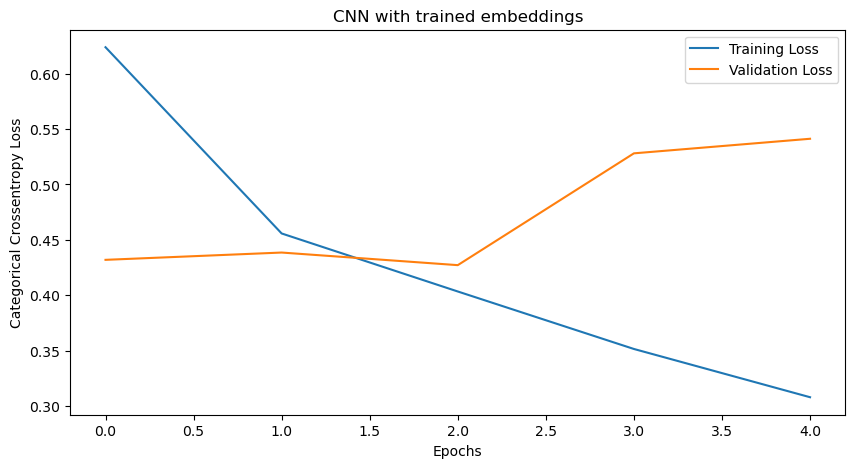

In [147]:
plt.figure(figsize = (10,5))
plt.plot(results.index, results.loss)
plt.plot(results.index, results.val_loss)
plt.title("CNN with trained embeddings")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

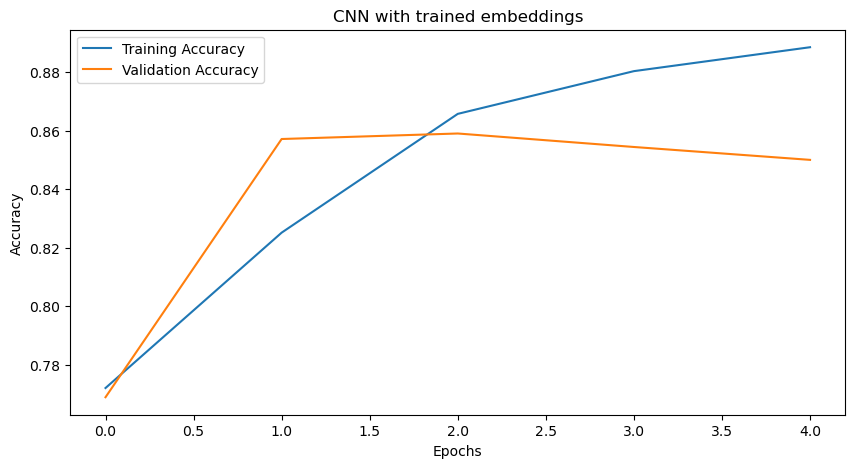

In [148]:
plt.figure(figsize = (10,5))
plt.plot(results.index, results.accuracy)
plt.plot(results.index, results.val_accuracy)
plt.title("CNN with trained embeddings")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

In [152]:
y_pred = model1.predict(X_cv_tk)
predicted_categories = np.argmax(y_pred, axis =1)
true_categories = tensorflow.concat([y for x, y in y_cv.tolist()], axis = 0).numpy()


# to do:
# prediction/show metrics
# yoon kim model
# word embeddings: word2vec and glove
# grid search


# then lstm

  1/150 [..............................] - ETA: 4s

150/150 [==============================] - 1s 7ms/step


TypeError: cannot unpack non-iterable int object

## CNN with pretrained embedding: Glove

## CNN with pretrained embedding: word2vec

## Parameter search